In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile
import joblib
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [45]:
path= r"C:\Users\User\Desktop\assignment\My_Task\Week_11\wine+quality.zip"

In [46]:
def load_path(path):
    with ZipFile(path, 'r') as ref_zip:
     ref_zip.printdir()

In [47]:
load_path(path)

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [48]:
with ZipFile(path) as z:
    with z.open("winequality-white.csv") as f:
        wine=pd.read_csv(f, sep=';')

In [49]:
df=wine

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [51]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [52]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

##   Data Preprocessing

In [53]:
df['quality']=df['quality'].replace( {9: 'Best', 8:'Best', 7: 'Good', 6: 'Good',5: 'Average', 4: 'Bad', 3: 'Bad'})

## First-Level Splitting

In [54]:
x= df.drop(columns='quality')
y= df.quality



## Feature Scaling

In [55]:
scaler= MinMaxScaler(feature_range=(0,1))
x_scaled= scaler.fit_transform(x)

## Model Training

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=234)

In [57]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVM': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Naive-Bayes': GaussianNB()

}

Training LogisticRegression...
LogisticRegression Accuracy: 0.6806122448979591
Training SVM...
SVM Accuracy: 0.7673469387755102
Training Decision Tree...
Decision Tree Accuracy: 0.6959183673469388
Training K-Nearest Neighbour...
K-Nearest Neighbour Accuracy: 0.6969387755102041
Training Naive-Bayes...
Naive-Bayes Accuracy: 0.6193877551020408


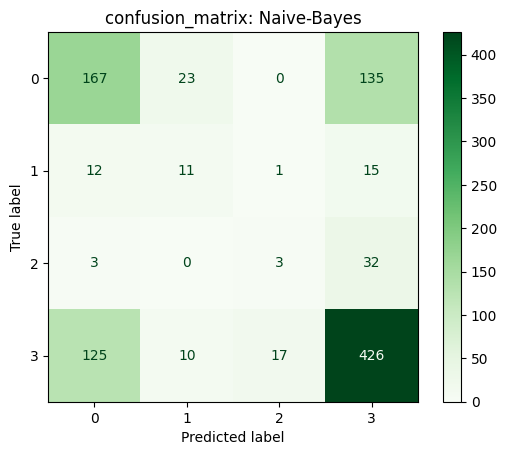

In [58]:
# Initialize a dictionary to store the models

results = {}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

# Include the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot with model name as title
disp.plot(cmap='Greens')
plt.title(f'confusion_matrix: {model_name}')
plt.show()





## Hyperparameter Tuning

In [59]:
# Since SVM has highest accuracy, i will select it from hyparameter tuning

rf= RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
# Pass the tuning parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the random search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=234), param_distributions = param_grid, cv=5, n_jobs= -1, verbose= 1)
random_search.fit(x_train, y_train)
print(f"Best parameters for Random Forest: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


Evaluation

In [61]:
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, x_scaled, y, cv=5)

print(f'Cross=validation for Random Forest Classifier: {cv_scores}')
print(f'Mean cross validation score: {cv_scores.mean()}')

Cross=validation for Random Forest Classifier: [0.66326531 0.66122449 0.69897959 0.69356486 0.72114402]
Mean cross validation score: 0.6876356548748201


In [62]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(x_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred, zero_division= 1))

Classification Report: 
              precision    recall  f1-score   support

     Average       0.72      0.66      0.68       325
         Bad       0.75      0.08      0.14        39
        Best       1.00      0.37      0.54        38
        Good       0.78      0.90      0.84       578

    accuracy                           0.77       980
   macro avg       0.81      0.50      0.55       980
weighted avg       0.77      0.77      0.75       980



In [63]:

# save the best model
joblib.dump(best_model, 'best_model.pkl')

# save the scalar
joblib.dump(scaler, 'scaler.pkl')

print('model and scaler has been successful saved')


model and scaler has been successful saved
